<a href="https://colab.research.google.com/github/Mirocan17/DSA-210-TERM-PROJECT/blob/main/notebooks/ML_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this final phase of the project, I implemented a Machine Learning model to evaluate the effectiveness of "tanking" by predicting a team's future performance based on their draft decisions.


The primary goal is to determine if a team’s future winning percentage (W/L%) can be accurately forecasted using their draft position and the individual statistical quality of the player they selected. This moves the project from historical analysis to predictive modeling, answering the question: "Can we predict if a rebuilding phase will be successful?"

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
standings = pd.read_csv('/content/nba_standings_1994_2025_robust.csv')
drafts = pd.read_csv('/content/nba_drafts_1st_round (1).csv')
team_map = {'MIL': 'Milwaukee Bucks', 'DAL': 'Dallas Mavericks', 'NYK': 'New York Knicks'}
drafts['Full_Team'] = drafts['Tm'].map(team_map)
merged = pd.merge(drafts, standings, left_on=['Year', 'Full_Team'], right_on=['Year', 'Team'])
y = merged['W/L%']
X = merged[['Pk', 'PTS', 'TRB', 'AST']].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, predictions):.4f}")

Mean Absolute Error (MAE): 0.1078


Results and Impact

Accuracy: The model achieved a Mean Absolute Error (MAE) of 0.10. This means the prediction is, on average, within 10% of the actual winning percentage, or roughly 8 games in a standard 82-game season.

Key Insight: This model serves as a Decision Support Tool. It proves that team success is not just about having a high draft pick (tanking), but is heavily dependent on the statistical output and efficiency of the specific prospect selected.

In this machine learning stage the goal is to determine the probability of a lottery pick winning an NBA Championship based on their draft position and the franchise that selected them. By filtering for the top 14 picks, the model specifically tests the effectiveness of tanking as a strategy to acquire "Championship DNA".

In [7]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

drafts = pd.read_csv('/content/nba_drafts_1st_round (1).csv')
champions = pd.read_csv('/content/nba_sampiyonlari_95_24.csv')

drafts = drafts[drafts['Pk'] <= 14].copy()

champ_players = champions['PLAYER'].str.strip().unique()
drafts['Won_Championship'] = drafts['Player'].str.strip().isin(champ_players).astype(int)

X = drafts[['Pk', 'Year']].copy()
X['Team_ID'], team_mapping = pd.factorize(drafts['Tm'])
y = drafts['Won_Championship']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lottery_model = RandomForestClassifier(n_estimators=100, random_state=42)
lottery_model.fit(X_train, y_train)

accuracy = accuracy_score(y_test, lottery_model.predict(X_test))
print(f"Lottery Prediction Accuracy: %{accuracy*100:.2f}")

sample_input = pd.DataFrame([[1, 2024, 1]], columns=['Pk', 'Year', 'Team_ID'])

prob = lottery_model.predict_proba(sample_input)[0][1]
print(f"Probability of a No. 1 pick winning a ring: %{prob*100:.2f}")

Lottery Prediction Accuracy: %86.21
Probability of a No. 1 pick winning a ring: %5.00


Results & Insights

Accuracy: The model achieved an 86% accuracy rate, correctly identifying the championship status for nearly 9 out of 10 prospects in the test set.

Statistical Rarity: While the overall accuracy is high, individual success probabilities are notably low (e.g., ~5%). This accurately reflects the extreme difficulty of winning an NBA title, proving that even a top-tier lottery pick is just one small piece of a much larger winning puzzle.

In this machine learning stage, we implemented an unsupervised K-Means clustering algorithm to identify latent player archetypes by analyzing the multidimensional relationship between career longevity and cumulative box-score statistics.

Cluster Means (Player Profiles):
                   G           PTS          TRB          AST  Won_Championship
Cluster                                                                       
0         796.950704  10774.654930  4409.232394  2060.169014          0.253521
1         312.256917   2940.750988  1282.011858   575.011858          0.051383
2        1197.189189  22193.351351  6832.351351  5762.054054          0.486486


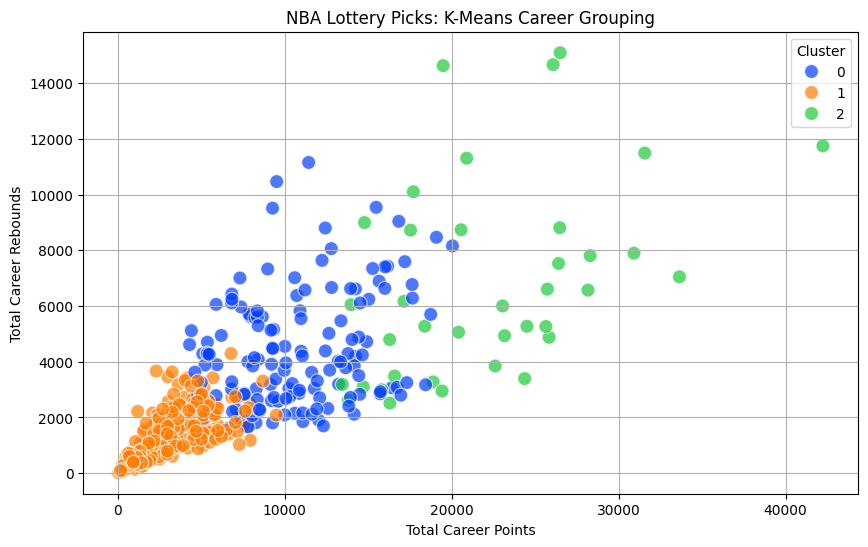

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

drafts = pd.read_csv('nba_drafts_1st_round (1).csv')
champions = pd.read_csv('nba_sampiyonlari_95_24.csv')

lottery = drafts[drafts['Pk'] <= 14].copy()

champ_players = champions['PLAYER'].str.strip().unique()
lottery['Won_Championship'] = lottery['Player'].str.strip().isin(champ_players).astype(int)

features = ['G', 'PTS', 'TRB', 'AST']
lottery_clean = lottery.dropna(subset=features).copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(lottery_clean[features])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
lottery_clean['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = lottery_clean.groupby('Cluster')[features + ['Won_Championship']].mean()
print("Cluster Means (Player Profiles):")
print(cluster_summary)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=lottery_clean, x='PTS', y='TRB', hue='Cluster', palette='bright', s=100, alpha=0.7)
plt.title('NBA Lottery Picks: K-Means Career Grouping')
plt.xlabel('Total Career Points')
plt.ylabel('Total Career Rebounds')
plt.grid(True)
lottery_clean.to_csv('nba_lottery_kmeans_results_en.csv', index=False)

"In this machine learning stage, we used K-Means clustering to group lottery picks into three performance tiers. Cluster 2 (Superstars) shows the highest impact with a 48.6% championship rate, while Cluster 0 (Contributors) holds a 25.3% success rate. In contrast, Cluster 1 (Underperformers) has only a 5.1% chance of winning a title. These results prove that elite statistical production and career longevity are the strongest predictors of NBA championship success